In [1]:
# Step1: Setup
Import pandas as pd

SyntaxError: invalid syntax (1613225145.py, line 2)

In [2]:
import pandas as pd

In [5]:
# Load dataset
df=pd.read_csv('../data/inputs/raw/Online_Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [6]:
# Data Cleasing Steps
# Find out what to clean

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Based on the df.info() etnry , we learn that there are 541,909 rows in the dataset, the dataset contains 8 columns - INvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country 

In [9]:
# df info() entry also tell me that Description Column got missing description 541909 vs 540455, ie. 1454 rows are missing
# InvoiceDate is showing dtype as an object, we should convert this to datetime


In [10]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# this entry shows me Quanity, UnitPrice and CustomerID. In the count row, all 3 columns have 541,909 entries, which means no missing values in these columns
# mean - average value of each column Qty = 9.55 per trnx, UnitPrice 4.61
# std - standard deviation shows that quantity has a large spread 218 vs 9.55, which suggests soeme outliers in the dataset.
#       UnitPrice also has a large spread 96.76 vs 4.61, which suggests some high prices in some trnx
# Qty wise, 25% of trnx had <=1, 50% had <=3 and 75% had <=10.  This shows that most orders are small.
# Next step, checking negative values:

df = df[(df['Quantity'] >0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [13]:
# the above entry resulted to have 530104 rows vs 541909 original total count. there are 11805 rows been filtered out
# checking the total count again to verify the changes

df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15292.571875
std,155.524124,35.915681,1484.197955
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14383.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,13541.330000,18287.000000


In [15]:
# chek outliers 

df = df['Quantity'].quantile(0.99)

df

IndexError: invalid index to scalar variable.

In [16]:
df = df['Quantity'].quantile(0.99)


IndexError: invalid index to scalar variable.

In [17]:
df['Quantity'].quantile(0.99)

IndexError: invalid index to scalar variable.

In [18]:
df = pd.read_csv("../data/inputs/raw/Online_Retail.csv", encoding="ISO-8859-1")

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df['Quantity'].quantile(0.99)

np.float64(100.0)

In [21]:
# the above entry confirms that 99% of trnx have Qty <= 100 items.  
# check 1% trnx have > 100 items for outliers

df[df['Quantity'] > 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029,United Kingdom
...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,15694,United Kingdom
541286,581497,22355,CHARLOTTE BAG SUKI DESIGN,110,2011-12-09 10:23:00,2.46,15287,United Kingdom
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,12985,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102,United Kingdom


In [22]:
# the result shows that there are 4950 rows/trnx have order > 100 units
# next step: clean and prepare data
# conver InvoiceDate from object to  object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


In [24]:
# check total missing values per column

df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [25]:
# the result shows that there are 1454 missing values NaN in the Description column only
# check the % of missing value to decise to drop or fill the missing  values

df[df.isnull().any(axis=1)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,15287,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,15287,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,15287,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom


In [26]:
df.isnull().mean() * 100

InvoiceNo      0.000000
StockCode      0.000000
Description    0.268311
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [27]:
# the missing values in  the Description column represents 26.8%. it is best to drop because 
#  the unknown value will distort the product aggregations
# so will remove the NaN and use cleaned file not to overwritten the orignal dataset. In case things went wrong i have a backup

df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [28]:
# update the InvoiceDate from object to datetime object due to df_cleaned is now the file to be updated

df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

C:\Users\selin\AppData\Local\Temp\ipykernel_1536\3156727095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [29]:
df_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [30]:
# Drop rows where CustomerID or Description is missing 
# Inplace=True modifies in DataFrame directly in memory instead of the original CSV file

df_cleaned = df_cleaned.dropna(subset=['CustomerID', 'Description'])

In [31]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [32]:
df_cleaned.sample(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86585,543555,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2011-02-10 10:18:00,1.25,17686,United Kingdom
52263,540700,21581,SKULLS DESIGN COTTON TOTE BAG,6,2011-01-11 09:47:00,2.25,12393,Australia
451248,575190,22138,BAKING SET 9 PIECE RETROSPOT,24,2011-11-09 09:21:00,4.25,15189,United Kingdom
237280,557850,23236,DOILEY STORAGE TIN,6,2011-06-23 10:56:00,2.89,12720,Germany
347169,567290,22329,ROUND CONTAINER SET OF 5 RETROSPOT,48,2011-09-19 11:54:00,1.45,14646,Netherlands
...,...,...,...,...,...,...,...,...
207680,554998,22423,REGENCY CAKESTAND 3 TIER,3,2011-05-29 15:35:00,12.75,15925,United Kingdom
362832,568526,21811,HANGING HEART WITH BELL,48,2011-09-27 13:04:00,0.39,17656,United Kingdom
144200,548732,22614,PACK OF 12 SPACEBOY TISSUES,24,2011-04-04 10:16:00,0.29,16142,United Kingdom
248045,558777,23089,GLASS BON BON JAR,1,2011-07-04 10:23:00,3.29,15287,United Kingdom


In [33]:
df_cleaned.shape

(540455, 8)

In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  int64         
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.1+ MB


In [35]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1486.741928


In [36]:
df_cleaned['InvoiceDate'].max() - df_cleaned['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [37]:
# remove any dupe rows
df_cleaned.drop_duplicates

<bound method DataFrame.drop_duplicates of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Unit

In [3]:
df_cleaned = df_cleaned.drop_duplicates()


NameError: name 'df_cleaned' is not defined

In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  int64         
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.1+ MB


In [39]:
df_cleaned.subscribe()

AttributeError: 'DataFrame' object has no attribute 'subscribe'

In [40]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1486.741928


In [41]:
display(df_cleaned.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [43]:
# handle negative values
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1486.741928


In [44]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

In [45]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15292.571875
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,14383.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15287.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16265.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1484.197955


In [46]:
# strip extra whitespace or symbols in the description
df_cleaned['Description'] = df_cleaned['Description'].str.strip()


C:\Users\selin\AppData\Local\Temp\ipykernel_1536\380570221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Description'] = df_cleaned['Description'].str.strip()


In [47]:
df_cleaned.loc[:, 'Description'] = df_cleaned['Description'].str.strip()

In [48]:
# create a new column TotalPrice to enable revenue analysis

df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

C:\Users\selin\AppData\Local\Temp\ipykernel_1536\175117825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [49]:
df_cleaned.loc[:, 'TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [50]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,530104.000000,530104,530104.000000,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15292.571875,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,14383.000000,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,15287.000000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16265.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,155.524124,NaN,35.915681,1484.197955,270.356743


In [51]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [52]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  int64         
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.4+ MB


In [53]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,530104.000000,530104,530104.000000,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15292.571875,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,14383.000000,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,15287.000000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16265.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,155.524124,NaN,35.915681,1484.197955,270.356743


In [54]:
df_cleaned.shape

(530104, 9)

In [55]:
# test data

In [56]:
assert df_cleaned['TotalPrice'].min() >= 0, "TotalPrice has negative values!", "TotalPrice has negative values!"

SyntaxError: invalid syntax (2244644878.py, line 1)

In [57]:
assert df_cleaned['TotalPrice'].min() >= 0, "TotalPrice has negative values!", "TotalPrice has negative values!"

SyntaxError: invalid syntax (2244644878.py, line 1)

In [58]:
assert df_cleaned['InvoiceDate'].dtype == 'datetime64[ns]', "InvoiceDate not properly converted to datetime", "InvoiceDate not properly converted to datetime"


SyntaxError: invalid syntax (3063447577.py, line 1)

In [60]:
df_cleaned.describe(include='all')
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


ModuleNotFoundError: No module named 'matplotlib'

In [63]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [64]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [65]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [66]:
import sys
print(sys.executable)



c:\Users\selin\dev\Project-1-Online-Retail-Transaction-Analysis\.venv\Scripts\python.exe


In [67]:
pip install matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
sns.set(style="whitegrid")

In [4]:
df_cleaned = df_cleaned.drop_duplicates()


NameError: name 'df_cleaned' is not defined

In [5]:
df = pd.read_csv("../data/inputs/raw/Online_Retail.csv", encoding="ISO-8859-1")
df_cleaned = df.copy()

In [6]:
df_cleaned = df_cleaned.drop_duplicates()


In [7]:
df_cleaned.drop_duplicates().head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
df_cleaned = df_cleaned.drop_duplicates()


In [9]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  int64  
 7   Country      536641 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 36.8+ MB


In [11]:
df_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15282.630153
std,219.130156,97.233118,1482.756881
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [13]:
df_cleaned.subscribe()


AttributeError: 'DataFrame' object has no attribute 'subscribe'

In [14]:
df_cleaned.Describe()

AttributeError: 'DataFrame' object has no attribute 'Describe'

In [15]:
df_cleaned.describe()


,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,15287.519829
std,218.007598,96.889628,1486.741928
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14364.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [17]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

In [18]:
df_cleaned = df_cleaned.drop_duplicates()

In [19]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [20]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,1482.145530


In [21]:
df_cleaned.shape()

TypeError: 'tuple' object is not callable

In [22]:
df_cleaned.shape

(524878, 8)

In [23]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,1482.145530


In [25]:
df_cleaned.isnull().mean() * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [27]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
 8   TotalPrice   524878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.0+ MB


In [29]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,524878.000000,524878,524878.000000,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345,20.275399
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.280031,NaN,36.093028,1482.145530,271.693566


In [ ]:
df_cleaned.shape



(524878, 9)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [34]:
# visualise distribution using a boxplot

<Axes: xlabel='Quantity'>

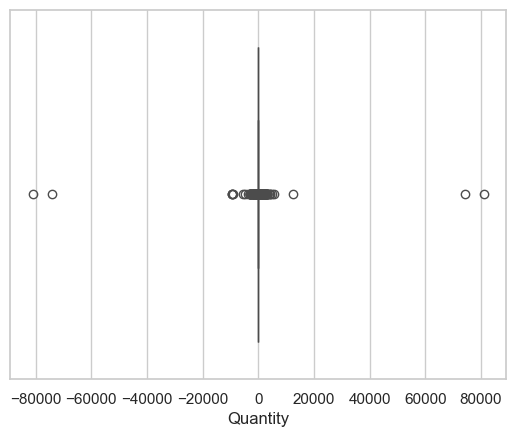

In [35]:
sns.boxplot(x=df['Quantity'])

Text(0.5, 1.0, 'Distribution of Quantity')

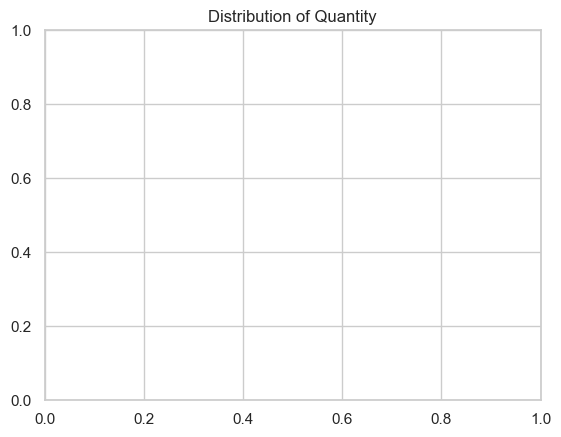

In [36]:
plt.title("Distribution of Quantity")

In [37]:
plt.show()

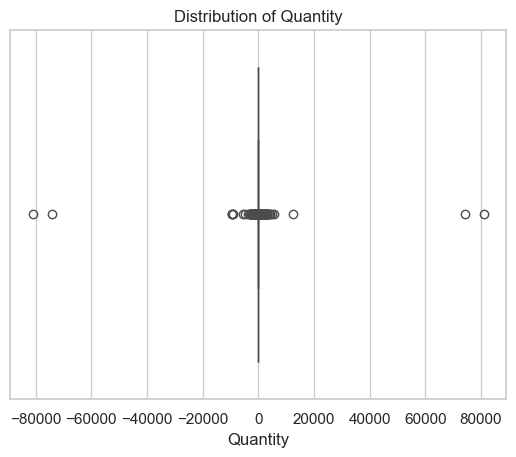

In [38]:
sns.boxplot(x=df['Quantity'])
plt.title("Distribution of Quantity")
plt.show()

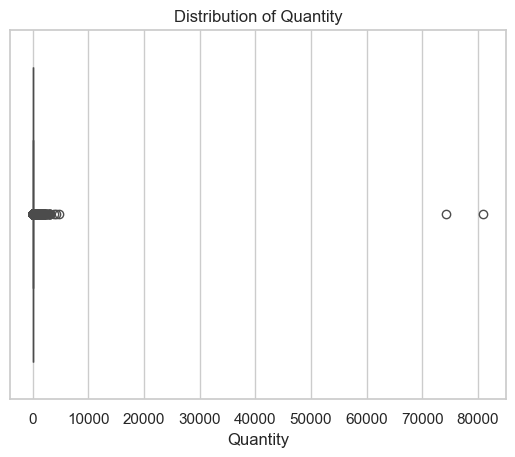

In [39]:
sns.boxplot(x=df_cleaned['Quantity'])
plt.title("Distribution of Quantity")
plt.show()

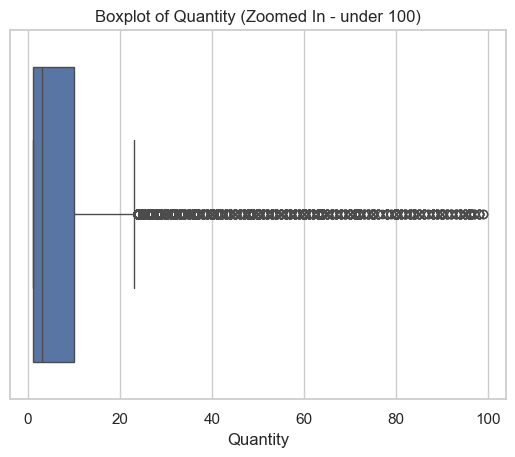

In [40]:
sns.boxplot(x=df_cleaned[df_cleaned['Quantity'] < 100]['Quantity'])
plt.title("Boxplot of Quantity (Zoomed In - under 100)")
plt.show()

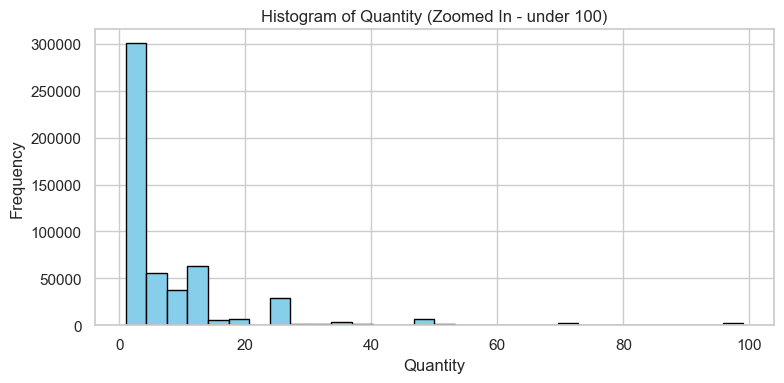

In [41]:
# Histogram to show Quantity Distribution (Zoomed In)
df_zoom = df_cleaned[df_cleaned['Quantity'] < 100]
plt.figure(figsize=(8, 4))
plt.hist(df_zoom['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity (Zoomed In - under 100)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()